##**SPRINT 03 - Configurando a connections no Apache Airflow**

O principal objetivo da **Sprint 03** foi realizar a configuração do **Apache Airflow** em especial o tópico **connections**.


No Apache Airflow, **as conexões (connections)** são usadas para armazenar informações de autenticação e configuração necessárias para se conectar a sistemas externos, como bancos de dados, armazenamento em nuvem, serviços da web e outras fontes de dados ou destinos.

As conexões são um recurso importante do **Airflow** que oferece várias finalidades:

* Gerenciamento Centralizado de Credenciais;
* Reutilização de Configuração;
* Flexibilidade;
* Manutenção mais Fácil;
* Segurança;
* Integração com Hooks e Operators;
* Facilidade de Configuração

Em resumo, as conexões no **Apache Airflow** são uma parte fundamental para a construção de **DAGs** que se conectam a sistemas externos e fontes de dados.

Elas ajudam a manter suas informações de autenticação seguras, melhoram a reutilização de configurações e simplificam a manutenção e a configuração dos **DAGs**. Isso torna o desenvolvimento e a execução de fluxos de trabalho de dados mais eficientes e seguros.

---

##**01- O processo de Configuração da Conexão - Connections**

**1.1-** O primeiro passo que foi realizado para a configuração das conexões, foi acessar o Apache Airflow e na sua página principal clicar em **Admin** (foto abaixo).

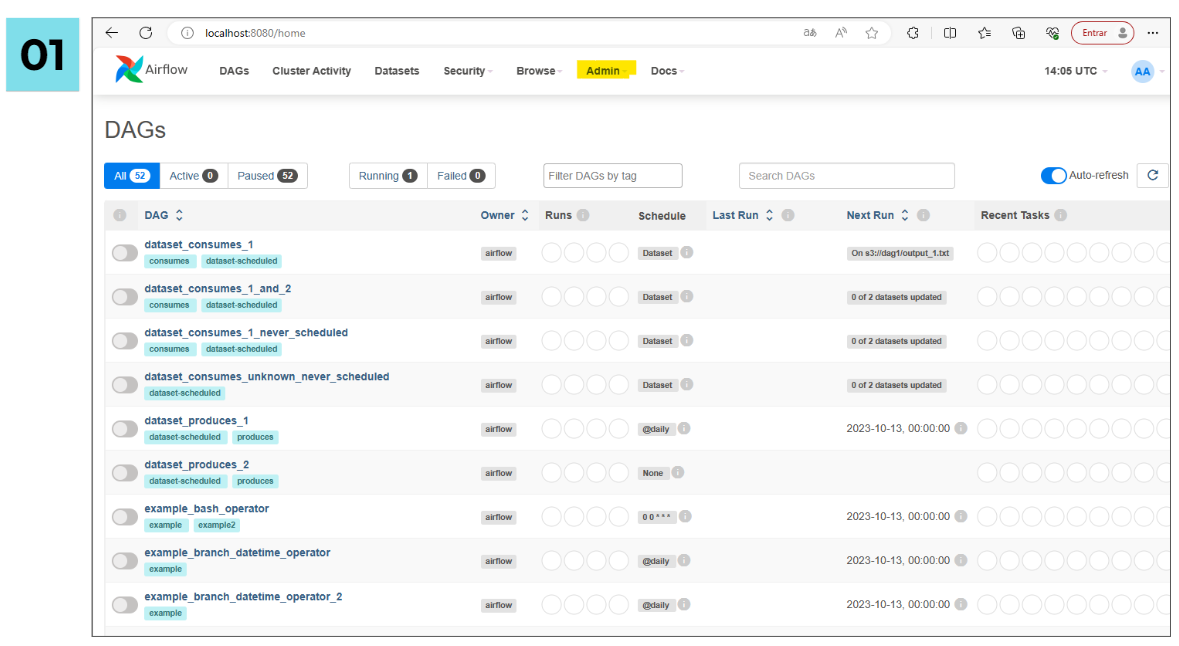

----

**1.2-** Após clicar em **adim** o passo seguinte foi clicar em **connections**.

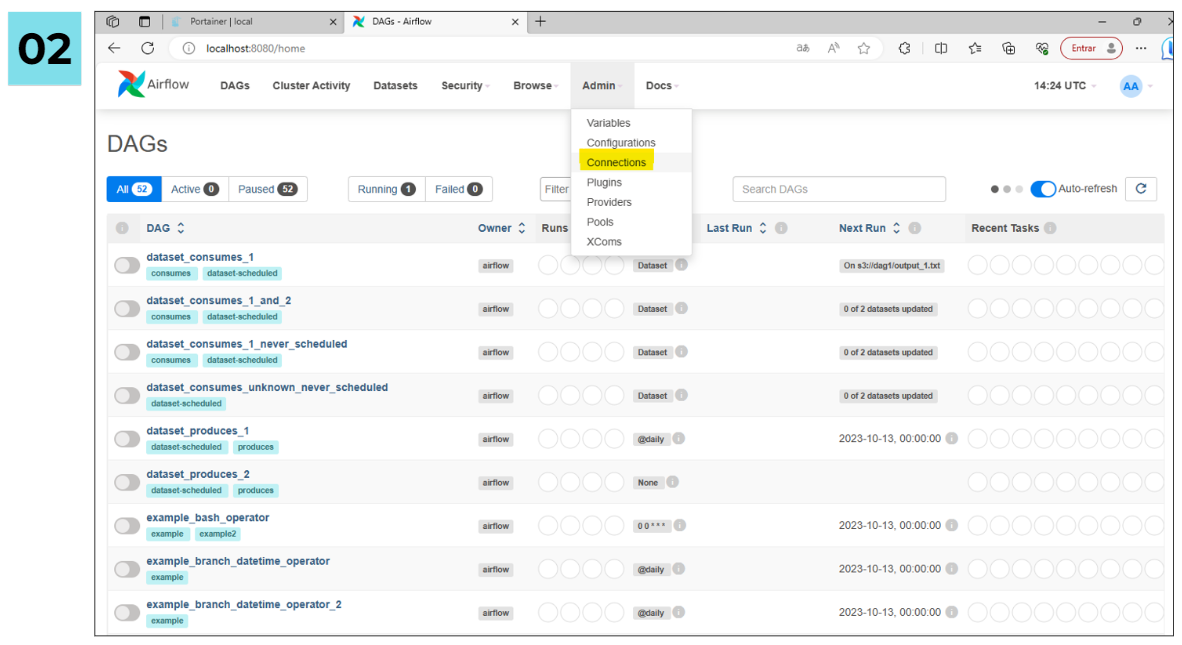

----

**1.3-** Após clicarmos em conexão caiermos na área de Lista de conexão.
* Próximo passo é clicarmos é clicarmos no sinal de mais que temos ao lado de **actions** para criarmos uma nova conexão.

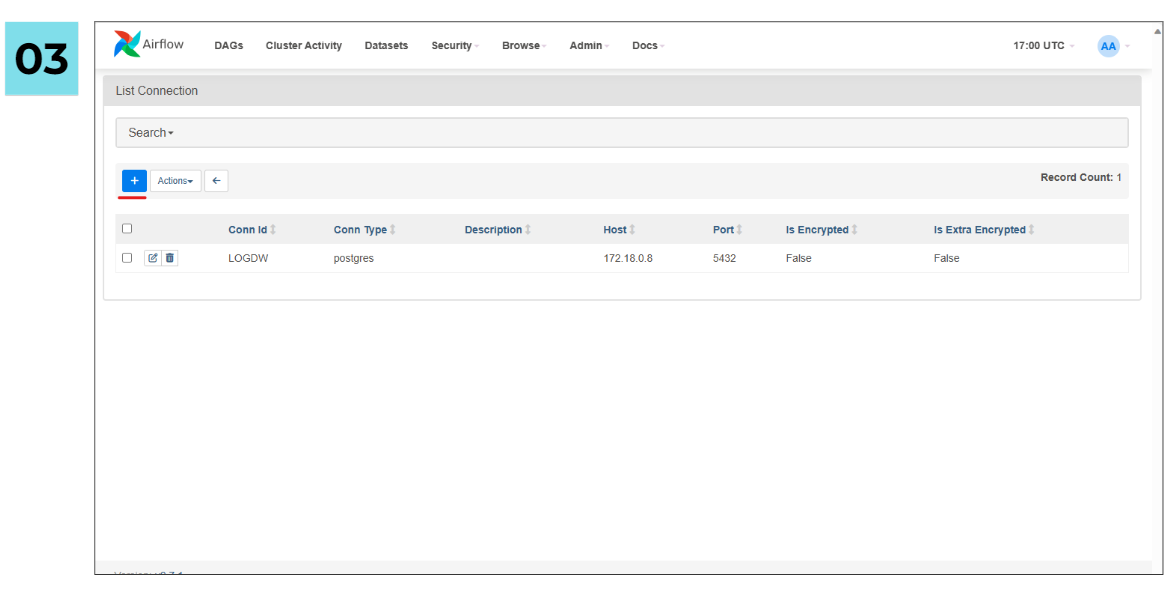

---

**1.4-** Dentro da área de criação de uma nova lista, iremos preencher os topicos obrigatorios.

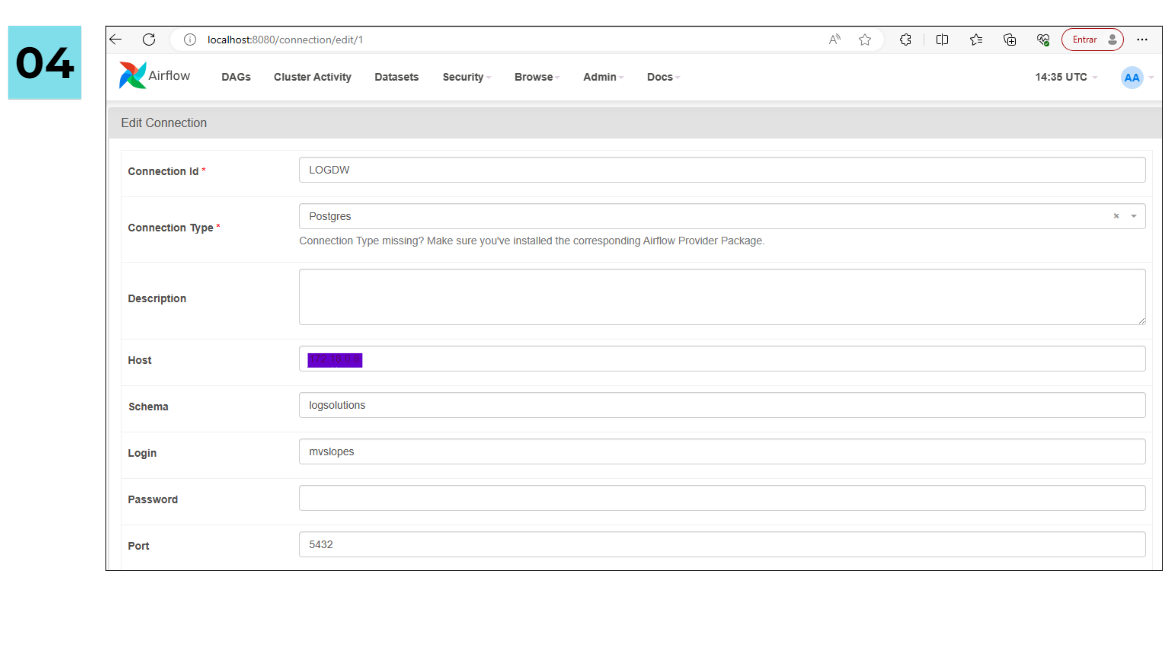

---

**1.5-** Após preencher todos os topicos obrigatorios, deve testar a conexão e caso tudo de acordo salvar a conexão.

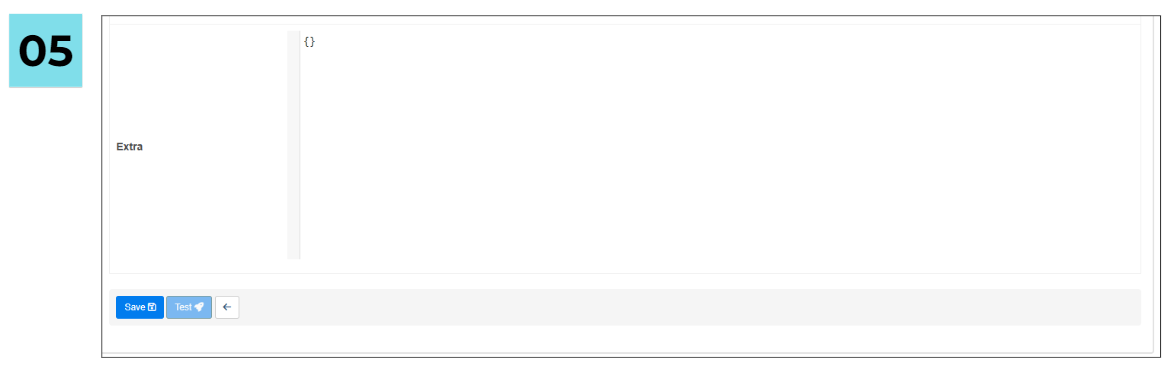

---

**1.6-** Explicando os Tópicos obrigatorios para preenchimento.



* **Connection Id**: É Um identificador exclusivo para a conexão. Esse identificador será usado em seus **DAGs** para se referir a essa conexão. No projeto foi usado o identificador **LOGDW** que está presente no nosso código Python e **postgres_operator**.





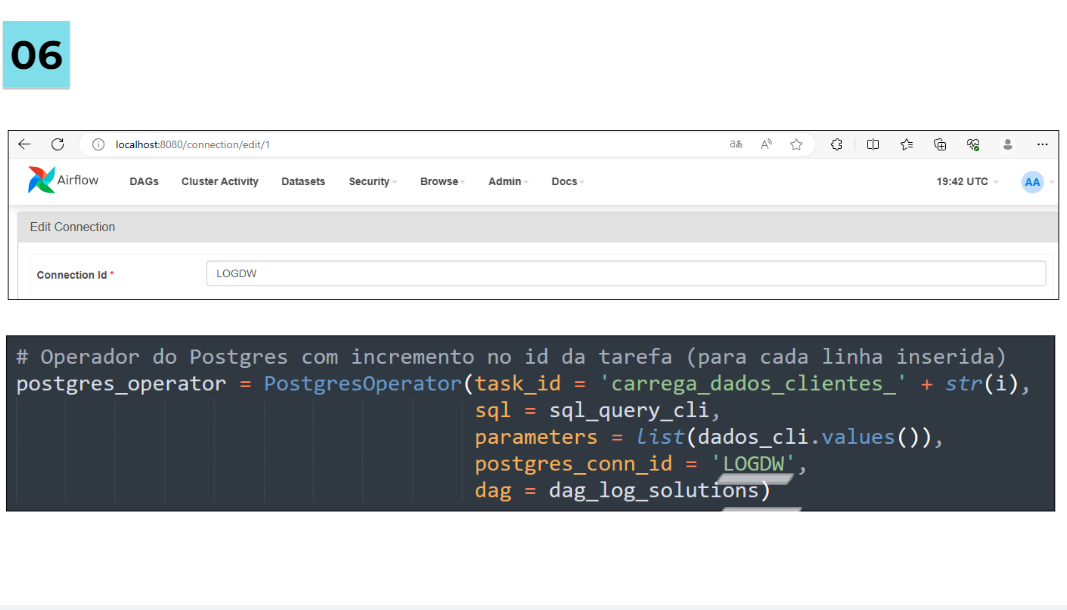

---

**1.7-** Tópicos obrigatorios para preenchimento.

**Connection Type** : Refere-se ao tipo de conexão que você está configurando, como banco de dados, HTTP, FTP, SSH, etc. Nesse caso o tipo de conexão é com o PostgresSQL

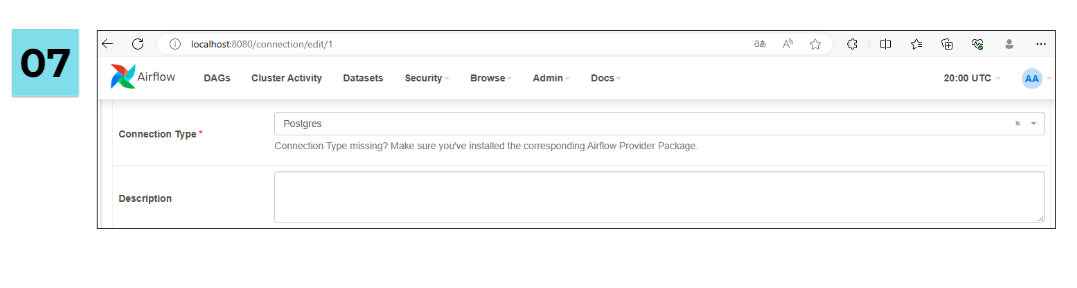

---

**1.8-** Tópico Obrigatorio para preenchimento\
**Host (Hospedeiro)** : Refere-se ao endereço do servidor ou serviço com o qual você deseja estabelecer a conexão. Isso pode ser um endereço IP, um nome de host, um URL ou qualquer outra forma de identificar o destino da conexão.

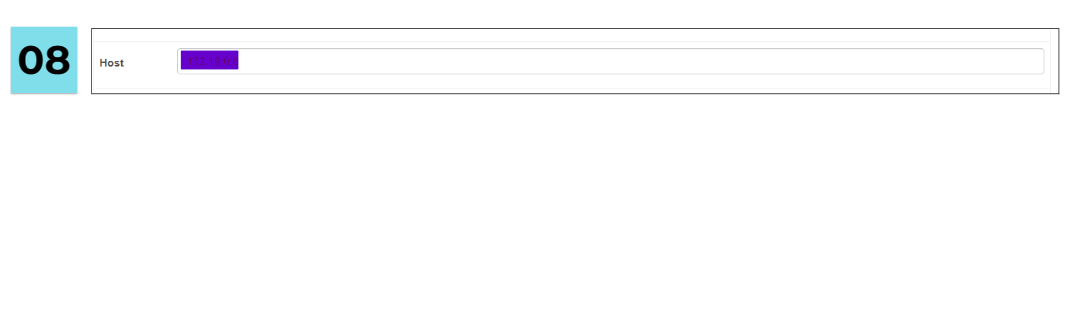

---

**1.8.1**- Colocando **Apache Airflow** e PostegreSQL na mesma rede de container Docker

Como o Docker tratou isso? Ele implementou uma rede local sempre que criamos um container, fornecendo uma rede para cada container individualmente.

Em nosso projeto, criamos dois containers um para o **Apache Airflow** e outro para o banco de dados **PostgreSQL**. O Docker, em última instância, é uma ferramenta de virtualização, permitindo a criação de máquinas virtuais leves. Os containers estão efetivamente reproduzindo o comportamento de máquinas virtuais, e, como essas máquinas virtuais precisam se conectar, o Docker cria uma rede virtual localmente em sua máquina. Normalmente, os containers criados são associados à rede **Bridge**, que é uma rede padrão. No entanto, é fundamental observar que o Docker permite a criação de redes personalizadas.

Em nosso projeto, o **Apache Airflow** criou uma rede personalizada para seus **containers**. Isso implicou que o container do **Airflow** e o container do banco de dados **PostgreSQL** estavam em redes diferentes. Qual foi o resultado prático disso? Eles não podiam se comunicar naquele momento, pois estavam em redes separadas, o que significava que não havia transferência de dados para o PostgreSQL.

No entanto, na arquitetura de infraestrutura que tínhamos estabelecido para o projeto, era necessário que esses dois componentes, o Apache Airflow e o PostgreSQL, se comunicassem. Como resolvemos a falta de conectividade?

---


**1.8.2-** Ajustando as redes dos containers **Apache Airflow e PostgreSQL**.

* **verificar as redes do containers**

Para Inspecionar a rede de todos os containers ao mesmo tempo, utilizamos o comando abaixo:


```
docker ps --format '{{ .ID }} {{ .Names }} {{ json .Networks }}'
```
Com esse comando via **terminal linux**, nos encontramos a rede de todos os **containers**. Nessa etapa do projeto o nosso objetivo foi colocar a rede do container do **PostgreSQL**

---

**1.8.3-** Ajustando a rede do container do **PostgreSQL**.

Após verificar que o container "logistica" que é o container que abriga o PostgreSQl esta em uma rede chamada **bridge** e o Apache Airflow na rede **airflow_default**. Foi necessário colocar o container do **PostgreSQL** na rede **airflow_default**.



**A- Desconectar o container da rede atual**

Uso no terminal linux.

```
docker network disconnect bridge logistica

```
**B- Conectar o container a rede desejada**

Uso no terminal linux.


```
docker network connect airflow_default logistica
```




**C- Inspecionar a rede de todos os containers ao mesmo tempo**

```
docker ps --format '{{ .ID }} {{ .Names }} {{ json .Networks }}'

```



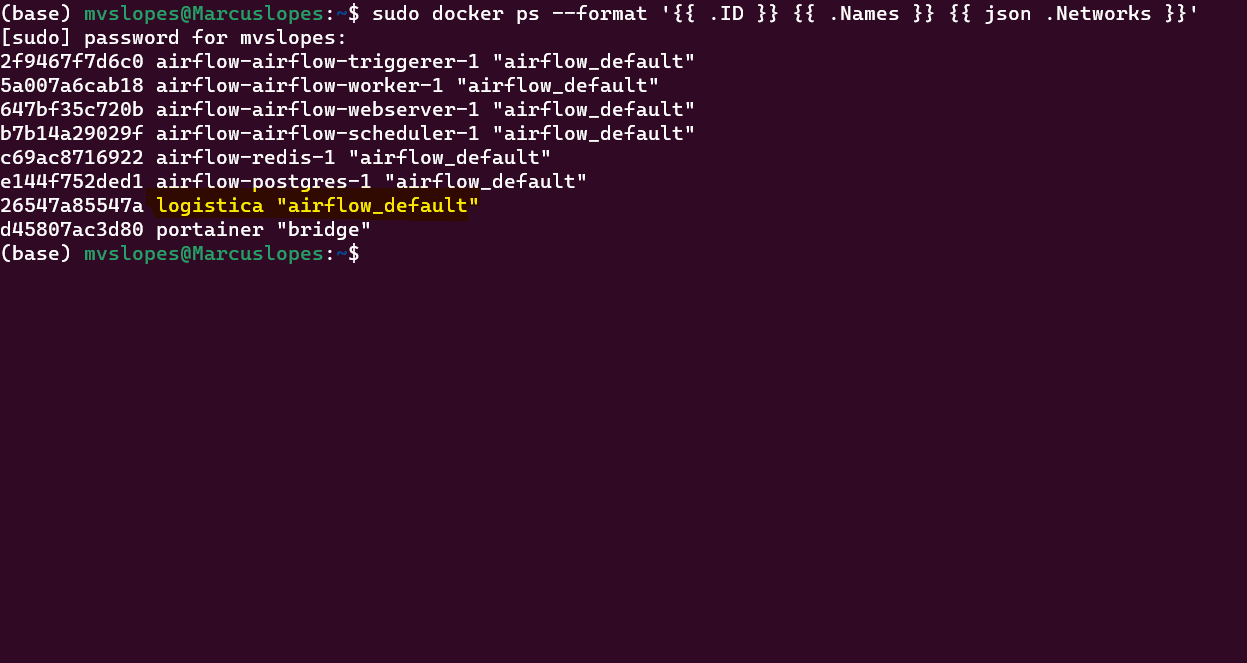

Após esse procedimento verificarmos que o Apache Airflow e o PostgreSql estão na mesma rede. Dessa forma podemos foi posiivel porseguir para encontrar o Host na configuração de conexões do Apache Airflow

**1.8.4-** Encontrando o **Host** da conexão do Apache Airflow.

Para **Host (Hospedeiro)** que pode ser um endereço IP, entramos no container do Banco de dados PostreSQL e pegarmos o endereço de IP, afinal  estamos configurando a conxeão do Airflow com o PostgreSQL. Para gerenciar os containers foi usado o **Portainer.io** isso facilita trabalhar com os containers através de uma interface gráfica. Foi acessado o container **logistica** clicando nele.

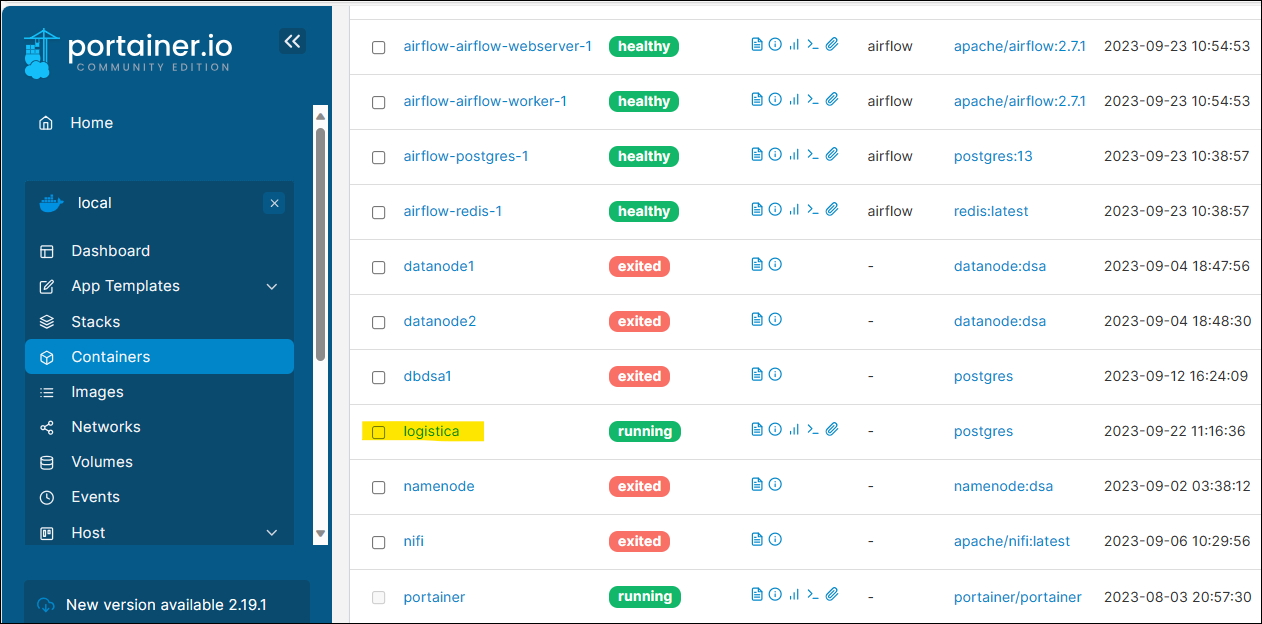



---

Foi acessada a área de **console**, ao clicar em **Console**.

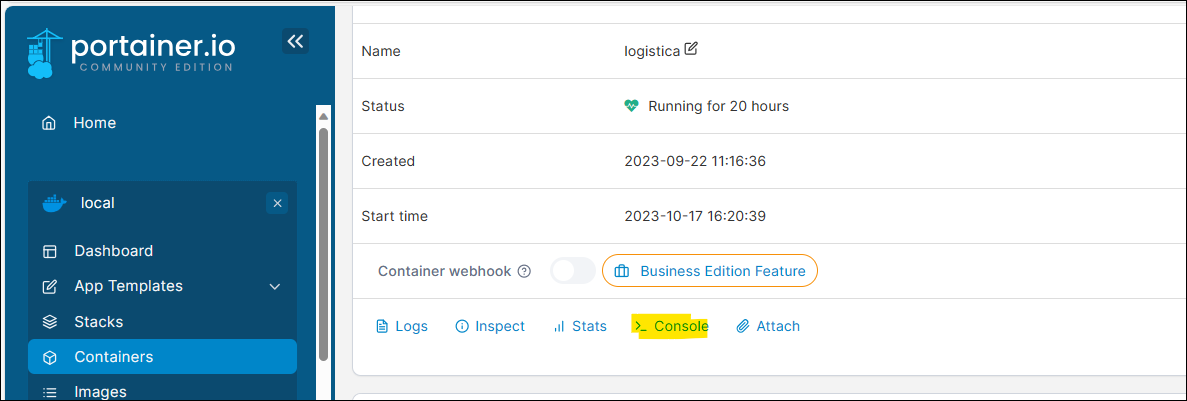

----

Foi acessada a área de **Connect**, ao clicar em **Connect**.

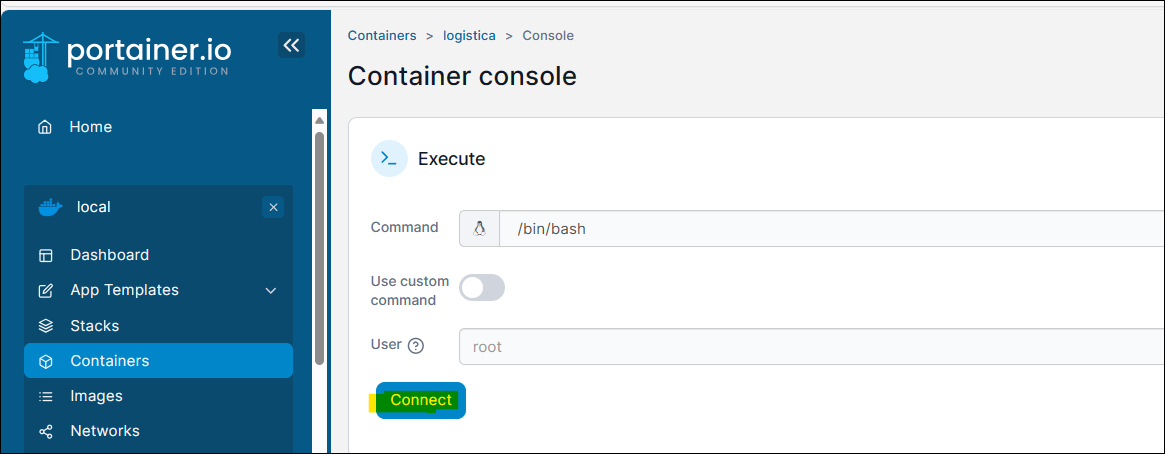

---

Dentro do **container** em seu terminal.



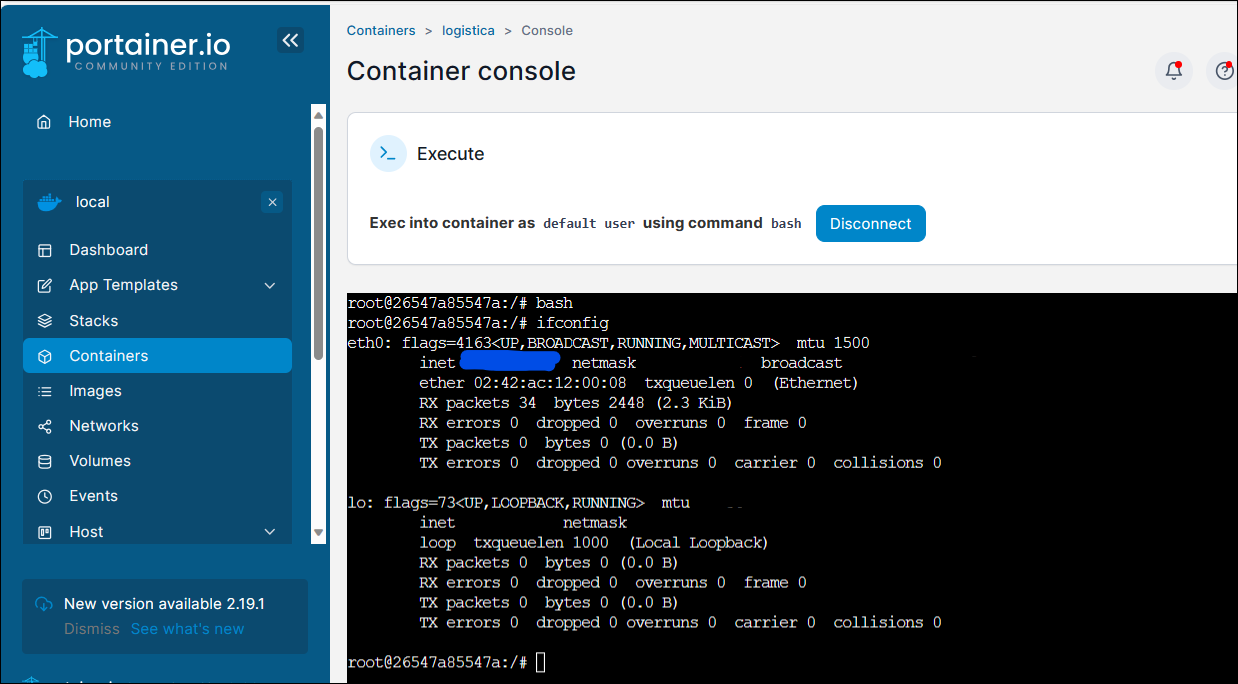

---

Foram utlizados os comandos

* Bash
*ifconfig

Como resultado tivemos o IP do container **marcado de azul**, esse número foi copiado e colocado no host, para estabelecermos a conexão.

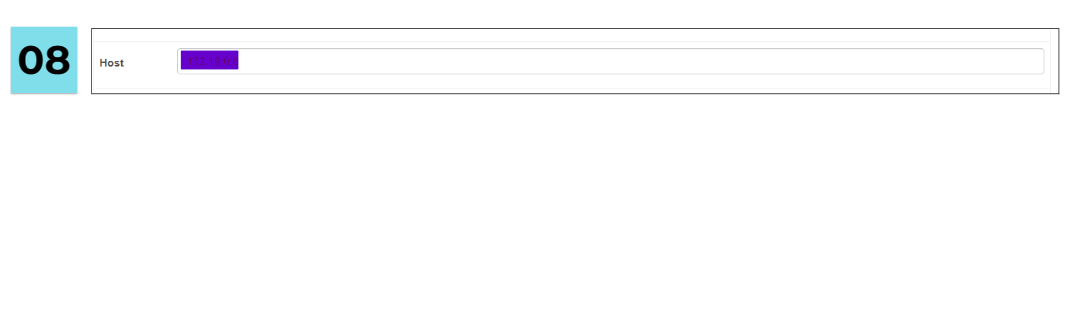

---

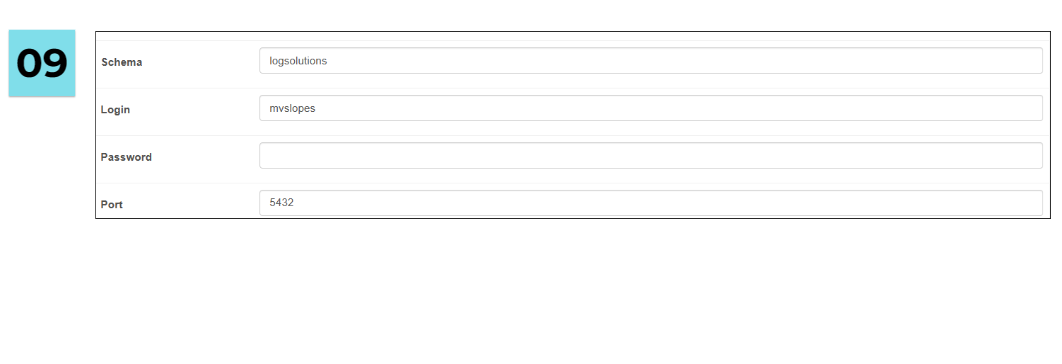

A configuração do **Topico 09**,foi baseado nas informações do código do container docker que foi utlizado para subir o banco de dados **PostgreSQL**


**docker run --name logistica -p XXXX:YYYY -e POSTGRES_USER=mvslopes -e POSTGRES_PASSWORD=ZZZZZZZ -e POSTGRES_DB=logsolutions -d postgres**


o comando foi usado para usado para criar e executar um contêiner do Docker.

**--name logistica** : Define o nome do contêiner como "logistica". Isso facilita a identificação e o gerenciamento do contêiner pelo nome, em vez de usar um ID longo.

**-p XXXX:YYYY** : Especifica o mapeamento de portas. Isso significa que a **porta XXXX** no host (sua máquina local) será mapeada para a **porta YYYY** no contêiner. Isso permite que você acesse o banco de dados PostgreSQL no contêiner usando a porta 5433 em sua máquina local. **Lembrando que as letras subsutituem os numeros e por questão de segurança de portas não foram colocados no código acima.**

**-e POSTGRES_USER=mvslopes** : Define uma variável de ambiente no contêiner chamada "POSTGRES_USER" com o valor "mvslopes". Isso define o nome de usuário do PostgreSQL que será criado no contêiner.

**-e POSTGRES_PASSWORD=ZZZZZZZZ** : Define outra variável de ambiente chamada "POSTGRES_PASSWORD" com o valor **"ZZZZZZZZ"**. Essa variável especifica a senha para o usuário do PostgreSQL.

**-e POSTGRES_DB=logsolutions** : Mais uma variável de ambiente chamada "POSTGRES_DB", que define o nome do banco de dados a ser criado no contêiner como **"logsolutions"**.

**-d postgres** : Especifica a imagem Docker a ser usada para criar o contêiner. Neste caso, está usando a imagem oficial do **PostgreSQL ("postgres")**. O parâmetro **"-d"** indica que o contêiner será executado em segundo plano (modo daemon).

---


Para confuguração da conexão do Apache Airflow foram usadas o topicos.

* **Schema = logsolutions** que Define o nome do banco de dados a ser criado no contêiner.

* **Login = mvslopes** que define o nome de usuário do PostgreSQL que será criado no contêiner.

* **PASSWORD=ZZZZZZZZ** : Define a senha para o usuário do PostgreSQL no container.

* **Port = 5432** - Especifica o mapeamento de portas. Isso significa que uma porta no host (sua máquina local) será mapeada para a porta 5432 no contêiner.

---


Após o processo de configuração dos tópicos obrigatórios, o próximo passo foi testar a conexão e salvar.



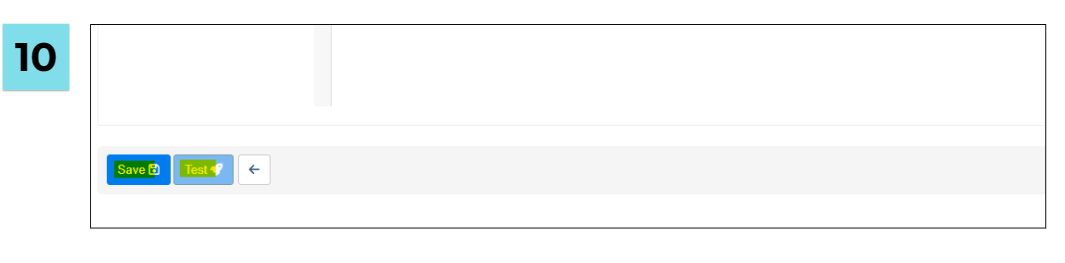

---

Conexão foi criada **CONN id = LOGDW**

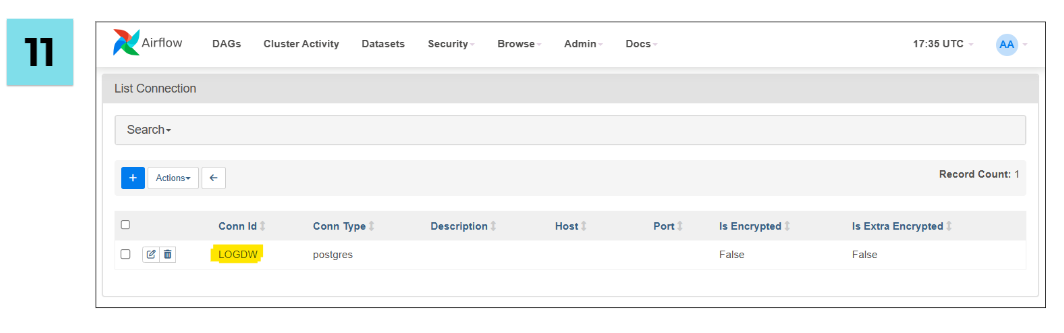

---

###**Sprint 03 - Finalizada**

O processo de configuração da **(Connectios)** Conexão dentro do **Apache Airflow** foi finalizado, implementado e funcionando. Isso permitiu o fluxo de dados para o **PostgreSQL**.